In [2]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

<Figure size 800x300 with 10 Axes>

In [4]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [5]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [27]:
# Multilayer Perceptrons (MLPs)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

"""
Test loss: 1.4308003038406372
Test accuracy: 0.5005

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Activation('elu'))
model.add(Dense(1000))
model.add(Activation('elu'))
model.add(Dense(100))
model.add(Activation('elu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
"""
"""
# Test loss: 1.9458996531486512
# Test accuracy: 0.6851

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Activation('elu'))
model.add(Dense(1000))
model.add(Activation('elu'))
model.add(Dense(100))
model.add(Activation('elu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
"""

"""
#Training MLP took 1835.7603313922882 seconds
#Test loss: 2.2038055744171143
#Test accuracy: 0.6506

model = Sequential()

# https://stackoverflow.com/questions/34619177/what-does-tf-nn-conv2d-do-in-tensorflow
model.add(Conv2D(64, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3)))
# https://www.quora.com/What-is-max-pooling-in-convolutional-neural-networks
model.add(MaxPooling2D(pool_size=(2, 2)))
# Ruido... más o menos
model.add(Dropout(0.25))

model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Activation('elu'))
model.add(Dense(1000))
model.add(Activation('elu'))
model.add(Dense(100))
model.add(Activation('elu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
"""
"""
# Test loss: 1.401836185646057
# Test accuracy: 0.7064
# Training MLP took 2226.8992404937744 seconds

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Activation('elu'))
model.add(Dense(1000))
model.add(Dropout(0.5))
model.add(Activation('elu'))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Activation('elu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
"""
"""
#Con sale 64 entra a 32:
# Test loss: 1.0052009043216705
# Test accuracy: 0.7138
# Training MLP took 2096.7810397148132 seconds

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='elu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Activation('elu'))
model.add(Dense(1000))
model.add(Dropout(0.5))
model.add(Activation('elu'))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Activation('elu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
"""
#Con sale 32 entra a 32:

# Test loss: 1.035853784275055
# Test accuracy: 0.7291
# Training MLP took 2071.0573613643646 seconds

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size=(3, 3), activation='elu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Activation('elu'))
model.add(Dense(1000))
model.add(Dropout(0.5))
model.add(Activation('elu'))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Activation('elu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.7280 - acc: 0.3732 - val_loss: 1.5017 - val_acc: 0.4785
Epoch 2/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.3908 - acc: 0.5085 - val_loss: 1.4048 - val_acc: 0.5395
Epoch 3/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.2834 - acc: 0.5457 - val_loss: 1.2704 - val_acc: 0.5934
Epoch 4/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.2207 - acc: 0.5702 - val_loss: 1.2528 - val_acc: 0.6040
Epoch 5/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.1637 - acc: 0.5943 - val_loss: 1.0984 - val_acc: 0.6533
Epoch 6/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.1136 - acc: 0.6117 - val_loss: 1.1234 - val_acc: 0.6478
Epoch 7/20
50000/50000 [==============================] - 102s 2ms/step - loss: 1.0715 - acc: 0.6267 - val_loss: 1.0122 - 

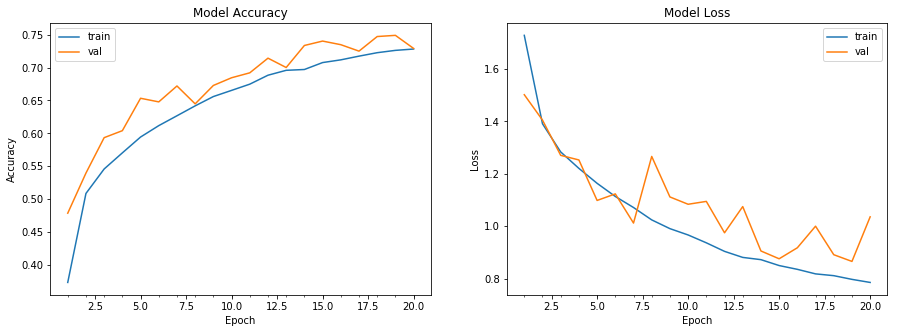

Training MLP took 2071.0573613643646 seconds


In [28]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test))
end = time.time()

loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")